# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#  Tagret is - price 

Inspect the various aspects of the housing dataframe

In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

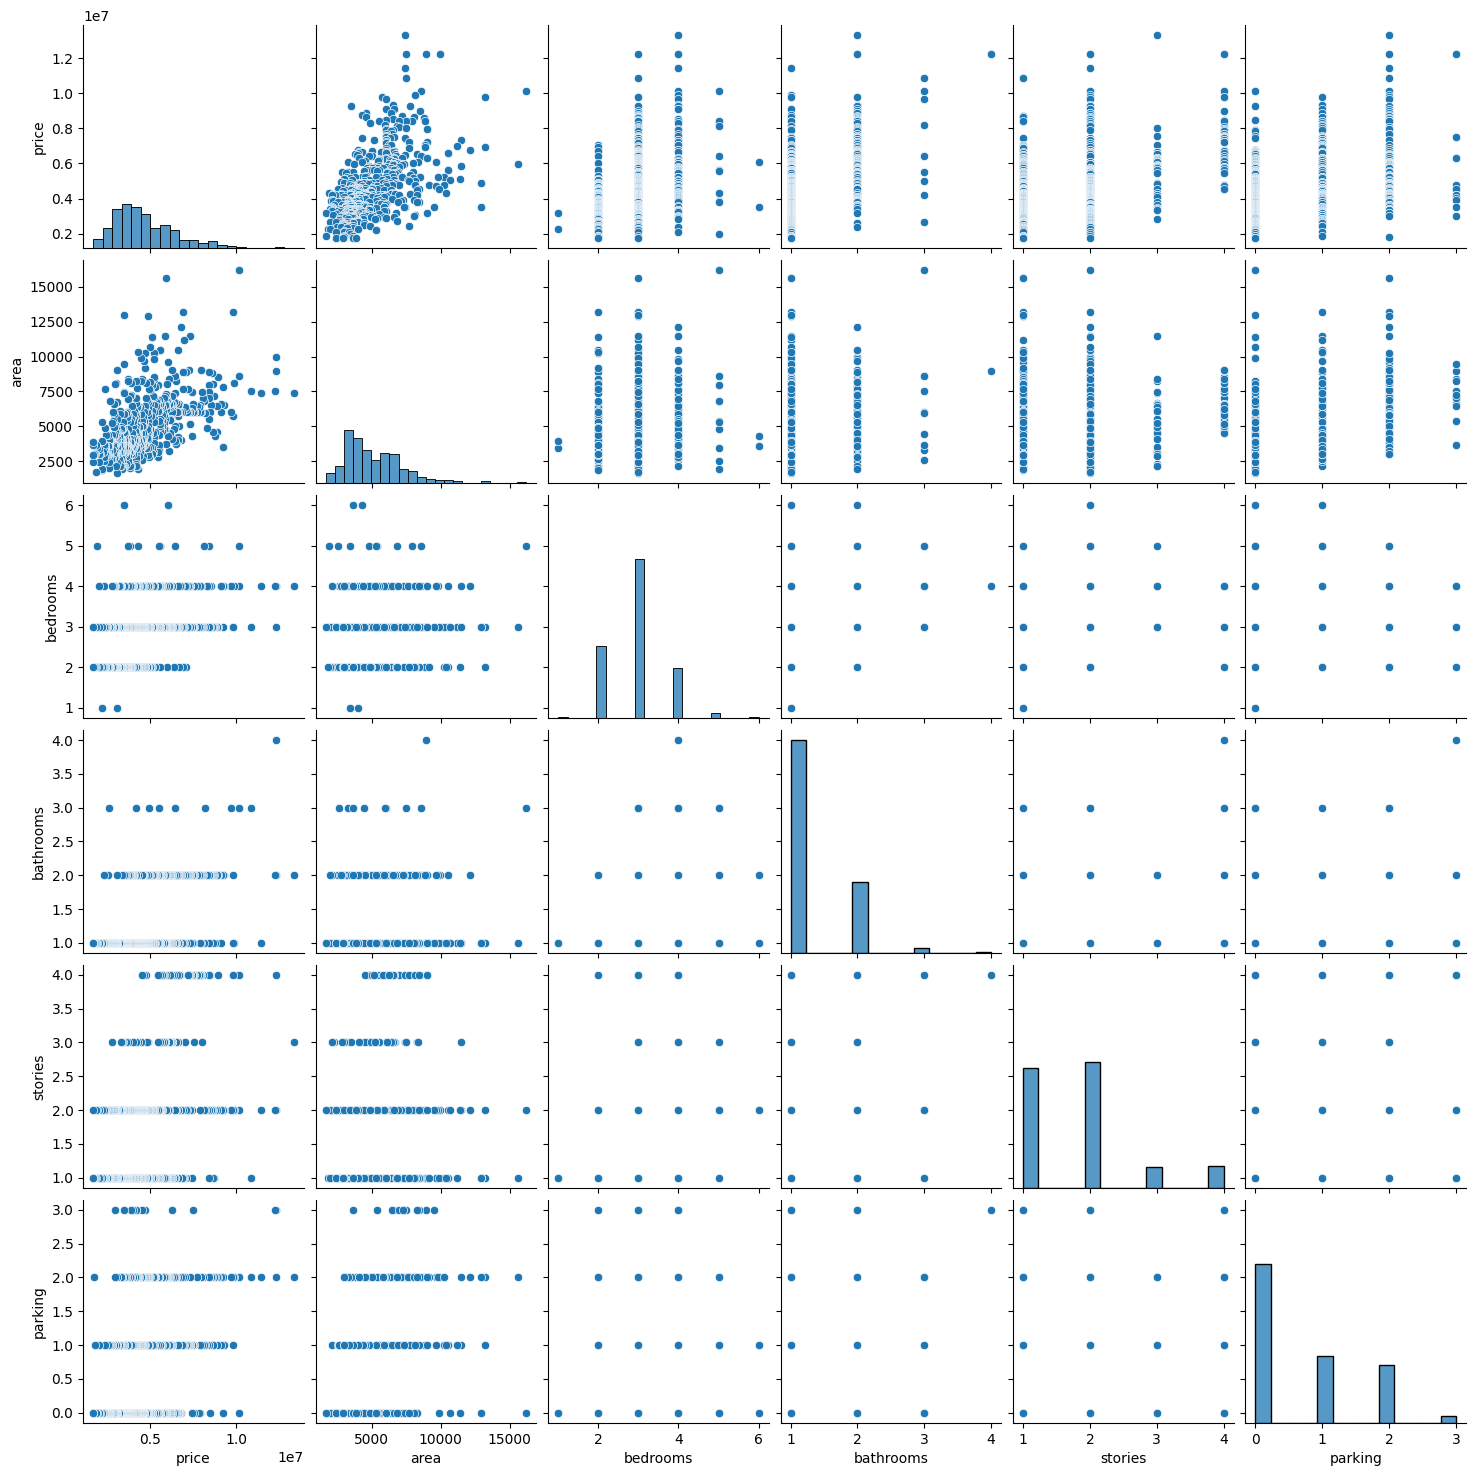

In [9]:
#  pair plot 
numeric_df = df.select_dtypes(include=['number'])
sns.pairplot(numeric_df)
plt.show()

#  I can see that there is positive correlation between price and area 


In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

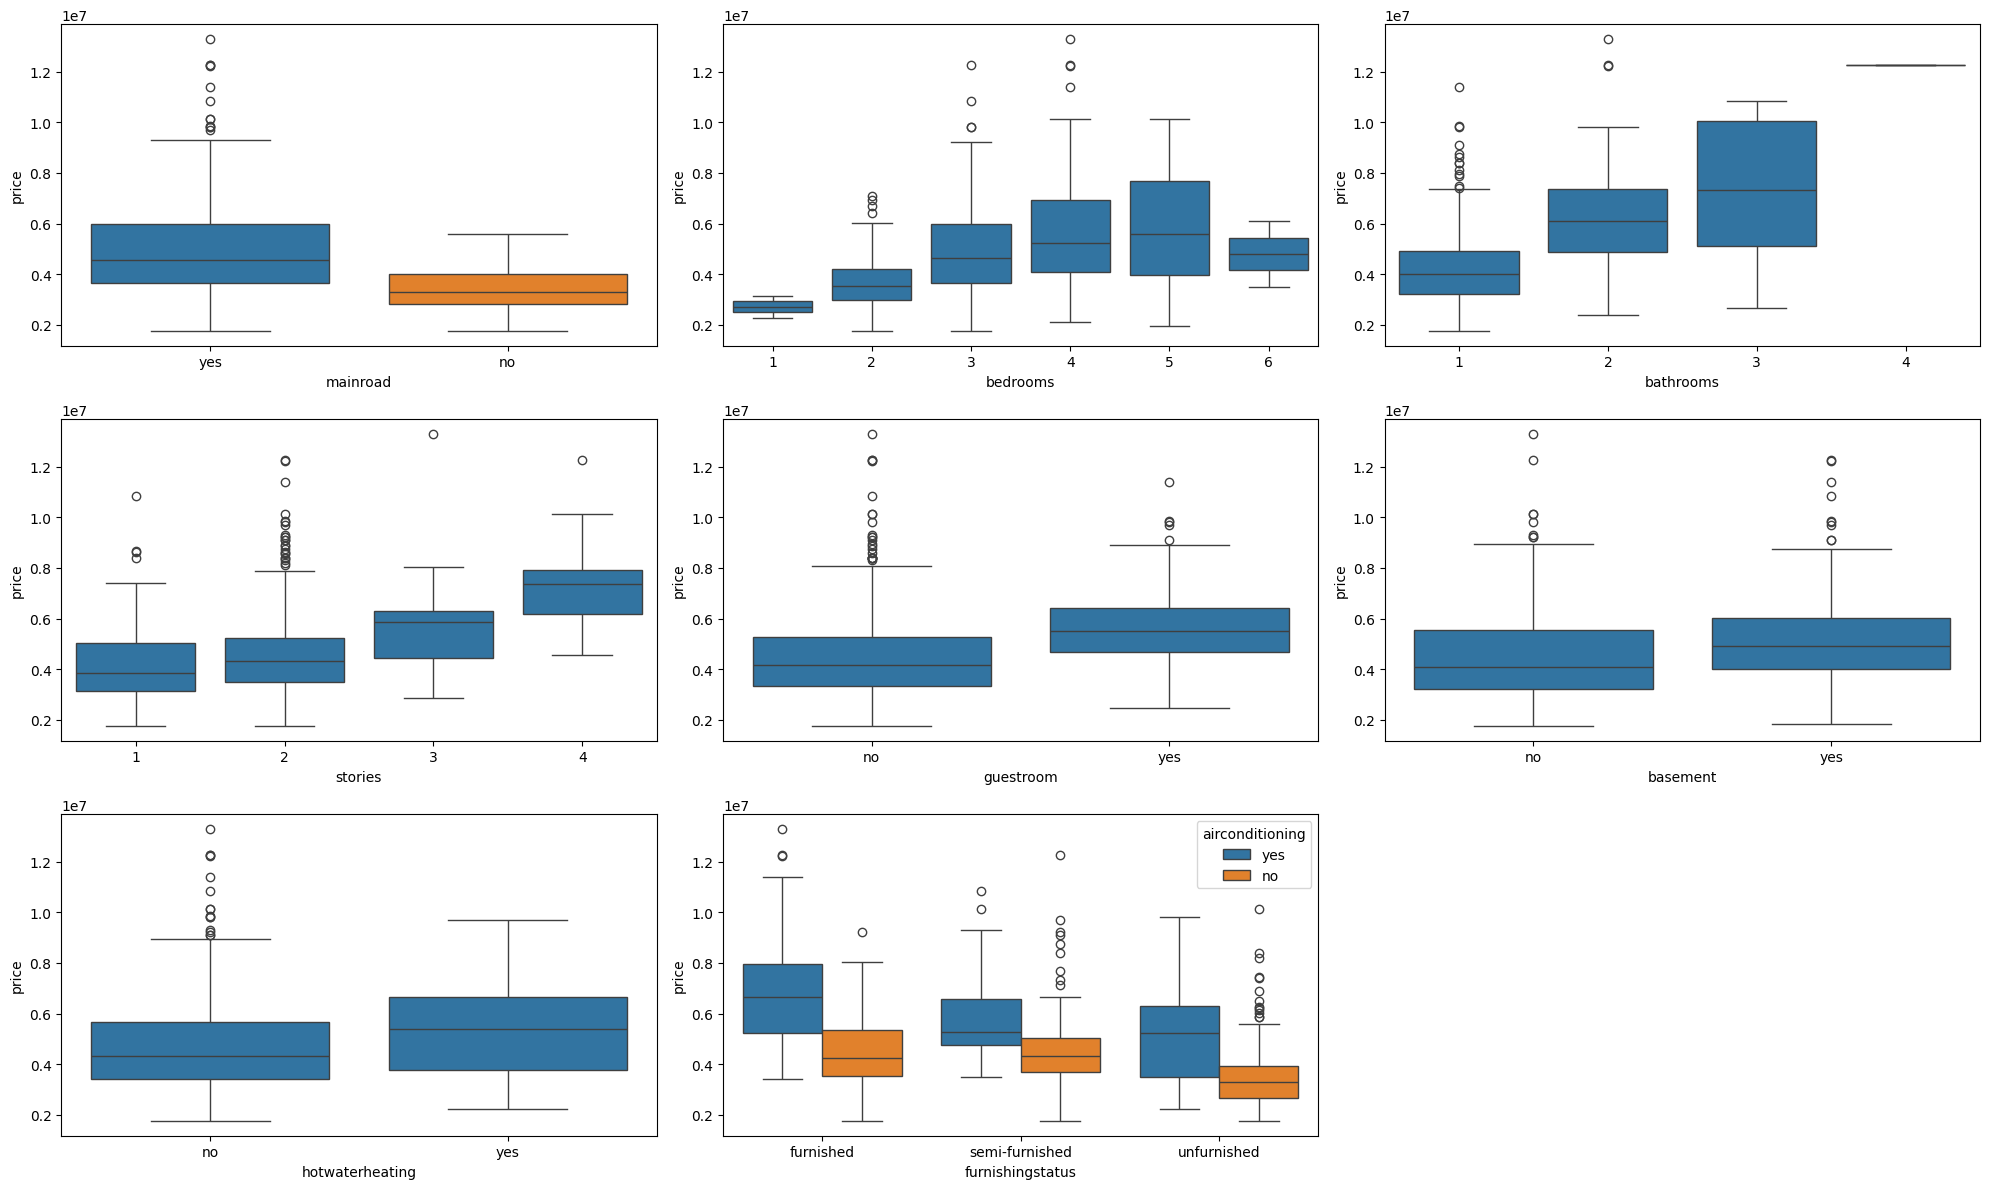

In [ ]:
# visualsing the categorical variables
# relationship between categorical variables and numeric variables - Box Plot

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price', data=df,hue='mainroad')

plt.subplot(3,3,2)
sns.boxplot(x='bedrooms', y='price', data=df)

plt.subplot(3,3,3)
sns.boxplot(x='bathrooms', y='price', data=df)

plt.subplot(3,3,4)
sns.boxplot(x='stories', y='price', data=df)

plt.subplot(3,3,5)
sns.boxplot(x='guestroom', y='price', data=df)

plt.subplot(3,3,6)
sns.boxplot(x='basement', y='price', data=df)

plt.subplot(3,3,7)
sns.boxplot(x='hotwaterheating', y='price', data=df)

plt.subplot(3,3,8)
sns.boxplot(x='furnishingstatus', y='price', data=df,hue='airconditioning')

plt.tight_layout()
plt.show()

#  If property is located at mainroad there is more price 

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

In [12]:
df.mainroad.value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [13]:
# convert all the categorical variables into numerical values - Encoding 
# Converting Binary vars into 1/0 and other categorical variables to dummy vars

binary_var_ls = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

df[binary_var_ls] = df[binary_var_ls].applymap(lambda x: 1 if x == 'yes' else 0)


In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [15]:
df.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

# **Dummy Variables**

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [16]:
#  Now coverting furnishingstatus variable to numerical 
#  Dummy Variables

status = pd.get_dummies(df['furnishingstatus'], dtype=int)
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [17]:
# Dropping furnished column because using 2 columns we can easily get same information
# for k categories we need k-1 dummy variables 

# dropping a redundent dummy variables
status = pd.get_dummies(df['furnishingstatus'], dtype=int,drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [18]:
#  concat the dummy dataframe with the original 
df = pd.concat([df,status],axis = 1)

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [20]:
#  dropping furnishingstatus as its categorical 
df = df.drop('furnishingstatus',axis=1)

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [22]:
from sklearn.model_selection import train_test_split 
# X = df.drop('price',axis=1)
# y = df['price']

In [23]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


# **Rescaling**

1. Min-Max Scaling (normalization)  : Between 0 and 1
   
   - normalization = (x - xmin)/(xmax-xmin)

2. Standardisation (mean-0, sigma-1) 

   - standardisation = (x-mean)/stdev

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
#  We will only scale numeric variables as if I do then no problem 

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# Fit on data 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,0.393333,0.378694,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,1
363,0.186667,0.132921,0.2,0.0,0.0,1,0,0,1,0,0.000000,0,1,0
370,0.180000,0.180756,0.2,0.0,0.0,1,0,0,0,1,0.666667,0,1,0
31,0.633333,0.367698,0.4,0.0,1.0,1,0,0,0,1,0.666667,0,1,0
113,0.412667,0.547766,0.4,0.0,0.0,1,0,1,0,0,0.666667,1,0,0


In [26]:
#  fit()  -> it basically sort of learns/computes xmax,xmin
#  transform() -> then it computes x-xmin/xmax-xmin

#  fit_transform() -> it does both the above steps at once

In [27]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.286896,0.239065,0.391601,0.087489,0.260717,0.863517,0.186352,0.359580,0.052493,0.317585,0.223097,0.236220,0.427822,0.309711
std,0.169026,0.149644,0.150553,0.158348,0.287619,0.343752,0.389902,0.480508,0.223313,0.466149,0.279060,0.425318,0.495413,0.462983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250667,0.195876,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.380000,0.321306,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Forward Selection - adding variables one by one 

<Axes: >

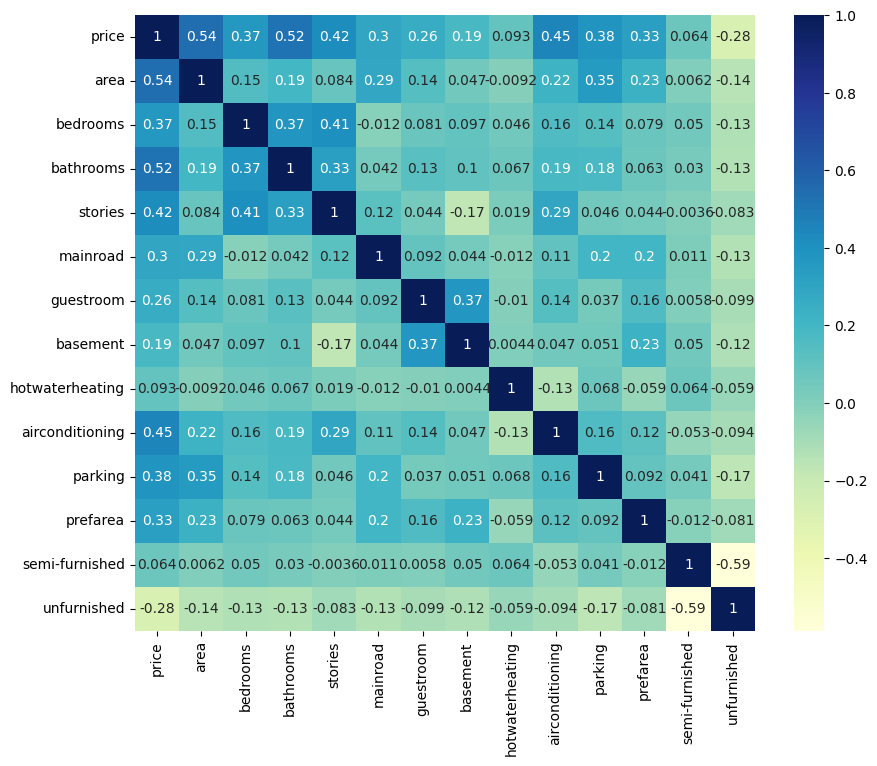

In [30]:
# heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linecolor='black')

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

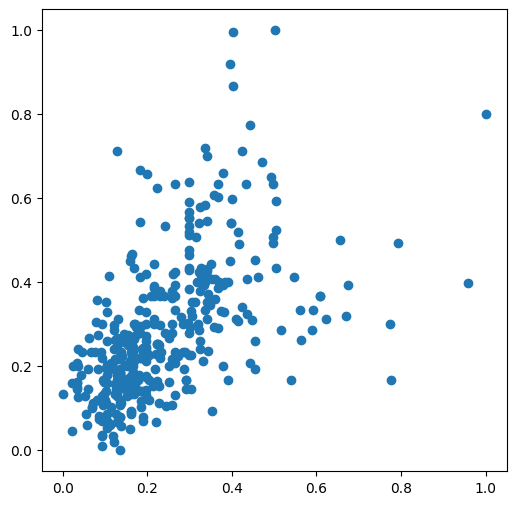

In [33]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

In [31]:
#  Start of with only single variable and keep on adding variable at a time

In [32]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,0.393333,0.378694,0.4,0.000000,0.000000,1,0,1,0,0,0.666667,1,0,1
363,0.186667,0.132921,0.2,0.000000,0.000000,1,0,0,1,0,0.000000,0,1,0
370,0.180000,0.180756,0.2,0.000000,0.000000,1,0,0,0,1,0.666667,0,1,0
31,0.633333,0.367698,0.4,0.000000,1.000000,1,0,0,0,1,0.666667,0,1,0
113,0.412667,0.547766,0.4,0.000000,0.000000,1,0,1,0,0,0.666667,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.476667,0.298969,0.6,0.333333,1.000000,1,0,0,0,1,0.000000,0,0,1
106,0.420000,0.261168,0.6,0.333333,0.000000,1,0,1,0,1,0.000000,1,1,0
270,0.246667,0.195876,0.4,0.333333,0.666667,1,0,0,1,0,0.333333,0,0,0
435,0.146667,0.164261,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1


### Dividing into X and Y sets for the model building

In [34]:
# since area is highest correlation with price so for now consider x and y 

X_train = df_train.drop('price',axis =1)
y_train = df_train['price']

In [172]:
# - statistical significance of the variable 
# - VIF

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [35]:
import statsmodels.api as sm

In [36]:
#  add a constant - considering only 1 feature i.e area 
X_train_sm = sm.add_constant(X_train['area'])

# create first model 
lr = sm.OLS(y_train,X_train_sm).fit()

#  params 
lr.params

const    0.138005
area     0.622805
dtype: float64

In [37]:
lr.summary()
# R2 = 0.30
#  about 30% of the variance is explained by area variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     165.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.10e-31
Time:                        19:47:00   Log-Likelihood:                 206.23
No. Observations:                 381   AIC:                            -408.5
Df Residuals:                     379   BIC:                            -400.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1380      0.014     10.113      0.000       0.111       0.165
area           0.6228      0.048     12.867      0.000       0.528       0.718
==============================================================================
Omnibus:                       71.553   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.819
Skew:                           0.988   Prob(JB):                     4.84e-33
Kurtosis:                       5.338   Cond. No.                         7.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

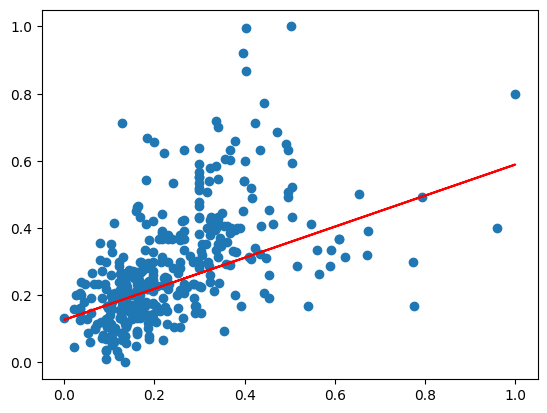

In [38]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.127 + 0.462*X_train_sm.iloc[:, 1], 'r')
plt.show()

### Adding another variable

The R-squared value obtained is `0.30`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [39]:
# adding another variables - bathroom as it is second highest correlated 

X_train_sm = sm.add_constant(X_train[['area','bathrooms']])

#  fit the model 
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

# R2 = 0.48
#  about 48% of variance in area is explained by two variables - area and bathrooms

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           9.34e-56
Time:                        19:48:43   Log-Likelihood:                 264.90
No. Observations:                 381   AIC:                            -523.8
Df Residuals:                     378   BIC:                            -512.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1197      0.012     10.130      0.000       0.096       0.143
area           0.5284      0.042     12.482      0.000       0.445       0.612
bathrooms      0.4671      0.040     11.676      0.000       0.388       0.546
==============================================================================
Omnibus:                       70.504   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.739
Skew:                           0.933   Prob(JB):                     4.59e-36
Kurtosis:                       5.601   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.489` from `0.3`.
Let's go ahead and add another variable, `bedrooms`.

In [40]:
#  adding bedrooms 

X_train_sm = sm.add_constant(X_train[['area','bathrooms','bedrooms']])
# fit model 
lr = sm.OLS(y_train,X_train_sm).fit()
# summary 
lr.summary()

#  r2 = 0.509 
#  increased 2% from 48 to 50 in r2 value by adding bedrooms to the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           5.57e-58
Time:                        19:49:34   Log-Likelihood:                 272.85
No. Observations:                 381   AIC:                            -537.7
Df Residuals:                     377   BIC:                            -521.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0590      0.019      3.092      0.002       0.021       0.096
area           0.5147      0.042     12.358      0.000       0.433       0.597
bathrooms      0.4007      0.043      9.410      0.000       0.317       0.484
bedrooms       0.1782      0.044      4.008      0.000       0.091       0.266
==============================================================================
Omnibus:                       57.689   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.883
Skew:                           0.807   Prob(JB):                     5.63e-27
Kurtosis:                       5.239   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

# Adding All Variables 

In [41]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [42]:
X_train_sm = sm.add_constant(X_train)
#  model training 
lr = sm.OLS(y_train,X_train_sm).fit()
# summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.00e-85
Time:                        19:49:55   Log-Likelihood:                 362.28
No. Observations:                 381   AIC:                            -696.6
Df Residuals:                     367   BIC:                            -641.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0359      0.023      1.587      0.113      -0.009       0.080
area                0.3510      0.038      9.351      0.000       0.277       0.425
bedrooms            0.0385      0.039      0.998      0.319      -0.037       0.114
bathrooms           0.3185      0.035      9.031      0.000       0.249       0.388
stories             0.1192      0.021      5.599      0.000       0.077       0.161
mainroad            0.0389      0.015      2.517      0.012       0.009       0.069
guestroom           0.0263      0.014      1.858      0.064      -0.002       0.054
basement            0.0460      0.012      3.794      0.000       0.022       0.070
hotwaterheating     0.0587      0.022      2.619      0.009       0.015       0.103
airconditioning     0.0653      0.012      5.502      0.000       0.042       0.089
parking             0.0866      0.019      4.547      0.000       0.049       0.124
prefarea            0.0485      0.012      3.925      0.000       0.024       0.073
semi-furnished     -0.0116      0.012     -0.941      0.347      -0.036       0.013
unfurnished        -0.0373      0.014     -2.741      0.006      -0.064      -0.011
==============================================================================
Omnibus:                       61.032   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.413
Skew:                           0.805   Prob(JB):                     4.38e-32
Kurtosis:                       5.550   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
#  dropping high pvalue feature  - non-significant feature 
#  Before that we will also see VIF 

#  we will make decision based on significane only but its better to take decision based on both of the ways

#  VIF(i) = 1/(1-R(i)^2)

# **Variance Inflation Factor**

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.71
4,mainroad,6.01
0,area,4.59
3,stories,2.86
11,semi-furnished,2.24
6,basement,2.17
9,parking,1.94
8,airconditioning,1.88
12,unfurnished,1.82
2,bathrooms,1.67


We could have : 
- High p-value , high VIF
  
- High-low
  - High p , low VIF  -> remove these first
  - High VIF , low p  -> remove these after the once above
  
- Low p_value , Low_VIF

We will give priority to High P value

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.34`. Let's go ahead and drop this variables

In [45]:
#  Semi-furnished is having a high P value 

X = X_train.drop('semi-furnished',axis = 1)


In [46]:
#  creating model without semi-furnished feature 
X_train_sm = sm.add_constant(X)
#  model training 
lr = sm.OLS(y_train,X_train_sm).fit()
# summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     69.05
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.83e-86
Time:                        20:03:17   Log-Likelihood:                 361.82
No. Observations:                 381   AIC:                            -697.6
Df Residuals:                     368   BIC:                            -646.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0269      0.021      1.314      0.190      -0.013       0.067
area                0.3521      0.038      9.388      0.000       0.278       0.426
bedrooms            0.0380      0.039      0.983      0.326      -0.038       0.114
bathrooms           0.3181      0.035      9.022      0.000       0.249       0.387
stories             0.1207      0.021      5.688      0.000       0.079       0.162
mainroad            0.0396      0.015      2.570      0.011       0.009       0.070
guestroom           0.0262      0.014      1.851      0.065      -0.002       0.054
basement            0.0463      0.012      3.826      0.000       0.023       0.070
hotwaterheating     0.0589      0.022      2.628      0.009       0.015       0.103
airconditioning     0.0663      0.012      5.608      0.000       0.043       0.090
parking             0.0871      0.019      4.576      0.000       0.050       0.125
prefarea            0.0486      0.012      3.935      0.000       0.024       0.073
unfurnished        -0.0297      0.011     -2.709      0.007      -0.051      -0.008
==============================================================================
Omnibus:                       62.361   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.914
Skew:                           0.821   Prob(JB):                     7.60e-33
Kurtosis:                       5.573   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# looking for VIF 

#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,6.90
4,mainroad,5.67
0,area,4.58
3,stories,2.85
6,basement,2.17
9,parking,1.94
8,airconditioning,1.86
2,bathrooms,1.67
5,guestroom,1.56
10,prefarea,1.50


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.9`) and a high p-value (`0.3`) as well. Hence, this variable isn't of much use and should be dropped.

In [48]:
#  removing bedrooms as it has both VIF and p_value highest 
X = X.drop('bedrooms',axis=1)


In [49]:
#  creating model without bedrooms feature 
X_train_sm = sm.add_constant(X)
#  model training 
lr = sm.OLS(y_train,X_train_sm).fit()
# summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     75.24
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           3.31e-87
Time:                        20:04:42   Log-Likelihood:                 361.32
No. Observations:                 381   AIC:                            -698.6
Df Residuals:                     369   BIC:                            -651.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0393      0.016      2.419      0.016       0.007       0.071
area                0.3550      0.037      9.496      0.000       0.282       0.429
bathrooms           0.3270      0.034      9.601      0.000       0.260       0.394
stories             0.1278      0.020      6.392      0.000       0.088       0.167
mainroad            0.0377      0.015      2.465      0.014       0.008       0.068
guestroom           0.0256      0.014      1.811      0.071      -0.002       0.053
basement            0.0480      0.012      4.004      0.000       0.024       0.072
hotwaterheating     0.0590      0.022      2.634      0.009       0.015       0.103
airconditioning     0.0667      0.012      5.640      0.000       0.043       0.090
parking             0.0885      0.019      4.664      0.000       0.051       0.126
prefarea            0.0490      0.012      3.969      0.000       0.025       0.073
unfurnished        -0.0301      0.011     -2.745      0.006      -0.052      -0.009
==============================================================================
Omnibus:                       65.541   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.295
Skew:                           0.845   Prob(JB):                     5.73e-36
Kurtosis:                       5.714   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# looking for VIF 

#  Create a Dataframe that will contain the names of all the features variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,mainroad,4.94
0,area,4.35
2,stories,2.36
5,basement,1.99
8,parking,1.92
7,airconditioning,1.86
1,bathrooms,1.59
4,guestroom,1.56
9,prefarea,1.50
10,unfurnished,1.32


In [189]:
# Non of VIF is high so now p_value of guestroom seems high 

# X = X.drop('guestroom',axis=1)

In [190]:
# #  creating model without bedrooms feature 
# X_train_sm = sm.add_constant(X)
# #  model training 
# lr = sm.OLS(y_train,X_train_sm).fit()
# # summary 
# lr.summary()

In [191]:
# # looking for VIF 

# #  Create a Dataframe that will contain the names of all the features variables and their respective VIF

# vif = pd.DataFrame()
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'],2)
# vif = vif.sort_values(by='VIF',ascending=False)
# vif

In [192]:
#  At last I tried to remove guestroom but accuracy drops so no need to do that.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [51]:
# Residuals = Actual-predicted 

#  Compute predicted values

y_train_pred  = lr.predict(X_train_sm)
y_train

126    0.393333
363    0.186667
370    0.180000
31     0.633333
113    0.412667
         ...   
71     0.476667
106    0.420000
270    0.246667
435    0.146667
102    0.423333
Name: price, Length: 381, dtype: float64

In [52]:
res = y_train-y_train_pred

<Axes: ylabel='Count'>

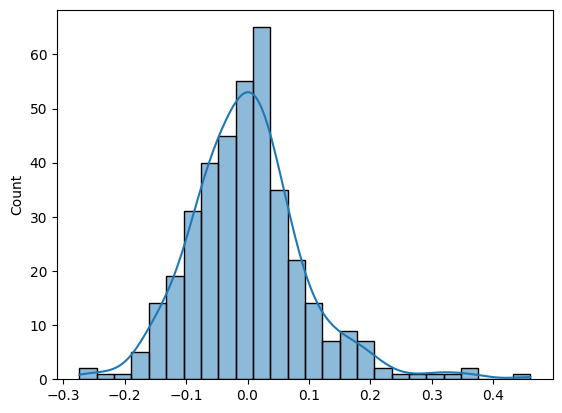

In [53]:
sns.histplot(res,kde=True)

<Axes: >

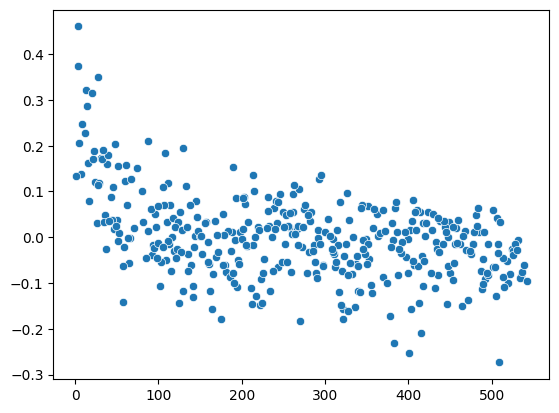

In [54]:
sns.scatterplot(res)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [55]:
#  rescaling features to test data as well 

# scaler = MinMaxScaler()

#  for test side we have to use the same scaler that we used for train side 
#  But instead of fit_transform we will use transform method - No Need to to fit()


num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

# Fit on data 
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
316,0.220000,0.292096,0.6,0.333333,0.333333,0,0,1,0,0,0.333333,0,0,1
77,0.466667,0.333333,0.4,0.333333,0.666667,1,0,0,0,1,0.000000,1,0,0
360,0.186667,0.164261,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,1,0
90,0.446667,0.230241,0.4,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0
493,0.100000,0.158763,0.4,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,0


In [56]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.288264,0.244122,0.396341,0.113821,0.286585,0.847561,0.158537,0.329268,0.030488,0.310976,0.250000,0.231707,0.390244,0.365854
std,0.198242,0.148394,0.140939,0.186230,0.292807,0.360547,0.366362,0.471387,0.172452,0.464311,0.305315,0.423215,0.489299,0.483144
min,0.000000,0.003436,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149167,0.127835,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240000,0.229897,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.390000,0.329897,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.416667,0.000000,1.000000,1.000000
max,1.100000,0.793814,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test = df_test['price']
X_test = df_test.drop('price',axis=1)

In [58]:
# adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [59]:
# make predictions 

y_test_pred = lr.predict(X_test_sm)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [60]:
#  R2 Square 
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_test_pred)
accuracy

0.645928128347943

In [61]:
lr.params

const              0.039252
area               0.355038
bathrooms          0.327046
stories            0.127757
mainroad           0.037695
guestroom          0.025571
basement           0.047988
hotwaterheating    0.059025
airconditioning    0.066653
parking            0.088519
prefarea           0.048990
unfurnished       -0.030071
dtype: float64

Text(0, 0.5, 'y_pred')

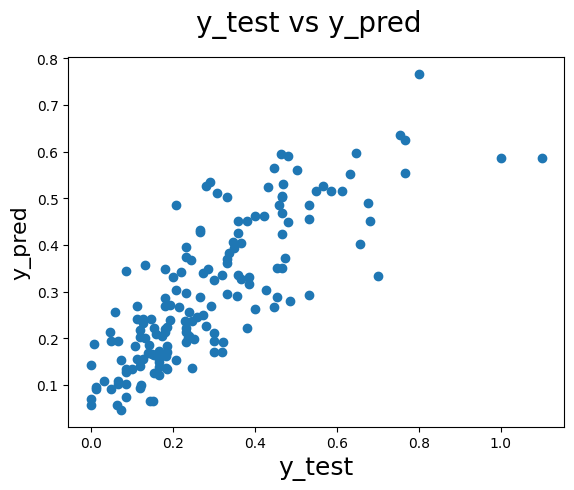

In [62]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      